In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import cv2
import PIL
from tensorflow.keras import layers
from PIL import Image

In [ ]:
image_size  = (224,224)
classifier = tf.keras.Sequential([
                               hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = image_size+(3,))
])

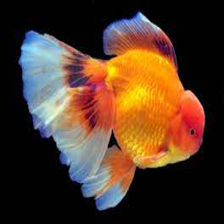

In [ ]:
cat = Image.open("gold_fish.jpg").resize(image_size)
cat

In [ ]:
print(cat)
img = np.array(cat)/255
img2 = cv2.imread(str(cat))
img.shape

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F411F50EF50>


(224, 224, 3)

In [ ]:
img[np.newaxis,...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(img[np.newaxis,...])
result.shape

(1, 1001)

In [ ]:
index = np.argmax(result)
index

2

In [ ]:
tf.keras.utils.get_file("ImageNetLabels.txt","https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt")

'/root/.keras/datasets/ImageNetLabels.txt'

In [ ]:
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt","r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin = url,cache_dir = ".",untar = True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg'),
 PosixPath('datasets/flower_photos/roses/4654893119_45d232016b.jpg'),
 PosixPath('datasets/flower_photos/roses/3278709893_ba4956a572_n.jpg'),
 PosixPath('datasets/flower_photos/roses/229488796_21ac6ee16d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('datasets/flower_photos/roses/18990187093_09f2bff8fc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/295257304_de893fc94d.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/568715474_bdb64ccc32.jpg'),
 PosixPath('datasets/flower_photos/roses/15174615529_144ae28bdb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15202632426_d88efb321a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2331651885_619653a5d3.jpg'),
 PosixPath('datasets/flower_photos/roses/172311368_49412f881b.jpg'),
 PosixPa

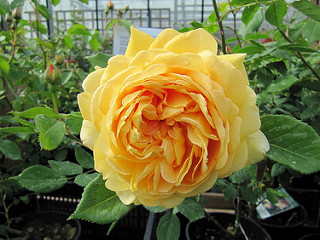

In [ ]:
Image.open(str(roses[0]))

In [ ]:
list(data_dir.glob('roses/*'))[0]

PosixPath('datasets/flower_photos/roses/5731750490_ba3325b7ee_n.jpg')

In [ ]:
flower_dir_dic = {
    "daisy":list(data_dir.glob('daisy/*')),
    "dandelion":list(data_dir.glob('dandelion/*')),
    "roses":list(data_dir.glob('roses/*')),
    "sunflowers":list(data_dir.glob('sunflowers/*')),
    "tulips":list(data_dir.glob('tulips/*'))
}

In [ ]:
flower_name = {
    "daisy":0,
    "dandelion":1,
    "roses":2,
    "sunflowers":3,
    "tulips":4
}

In [ ]:
for names,dir in flower_dir_dic.items():
  print(dir)

[PosixPath('datasets/flower_photos/daisy/181007802_7cab5ee78e_n.jpg'), PosixPath('datasets/flower_photos/daisy/450128527_fd35742d44.jpg'), PosixPath('datasets/flower_photos/daisy/5058708968_8bdcd29e63_n.jpg'), PosixPath('datasets/flower_photos/daisy/3336704121_cfeb67a7d7.jpg'), PosixPath('datasets/flower_photos/daisy/4286053334_a75541f20b_m.jpg'), PosixPath('datasets/flower_photos/daisy/7410356270_9dff4d0e2e_n.jpg'), PosixPath('datasets/flower_photos/daisy/14621687774_ec52811acd_n.jpg'), PosixPath('datasets/flower_photos/daisy/14167543177_cd36b54ac6_n.jpg'), PosixPath('datasets/flower_photos/daisy/1392946544_115acbb2d9.jpg'), PosixPath('datasets/flower_photos/daisy/3552074420_2a0a7166db_m.jpg'), PosixPath('datasets/flower_photos/daisy/5586977262_6b24412805_n.jpg'), PosixPath('datasets/flower_photos/daisy/5626784099_b36dd3fb11_n.jpg'), PosixPath('datasets/flower_photos/daisy/4511693548_20f9bd2b9c_m.jpg'), PosixPath('datasets/flower_photos/daisy/8383753520_8391dd80ee_m.jpg'), PosixPath('

In [ ]:
x,y =  [],[]
for names,dir in flower_dir_dic.items():
  for name in dir:
    img = cv2.imread(str(name))
    img_resize = cv2.resize(img,(224,224))
    x.append(img_resize)
    y.append(flower_name[names])
print(len(x))

3670


In [ ]:
x = np.array(x)
y = np.array(y)#we have to convert it to numpy array

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pre_train_model = hub.KerasLayer(
    feature_extractor_model,input_shape = (224,224,3),trainable =  False
)#here we freeze the layer except dense layer in above  model  it gives the feature vector  but in the earlier model it gives the classification

In [ ]:
model = keras.Sequential([
                          pre_train_model,
                          keras.layers.Dense(5)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =  True),
    metrics  = ["accuracy"] 
)
model.fit(x_train_scaled,y_train,epochs = 10)

Epoch 1/10
92/92 [==============================] - 7s 44ms/step - loss: 0.7830 - accuracy: 0.7088
Epoch 2/10
92/92 [==============================] - 4s 41ms/step - loss: 0.4097 - accuracy: 0.8580
Epoch 3/10
92/92 [==============================] - 4s 41ms/step - loss: 0.3180 - accuracy: 0.8941
Epoch 4/10
92/92 [==============================] - 4s 41ms/step - loss: 0.2643 - accuracy: 0.9162
Epoch 5/10
92/92 [==============================] - 4s 41ms/step - loss: 0.2310 - accuracy: 0.9302
Epoch 6/10
92/92 [==============================] - 4s 41ms/step - loss: 0.2061 - accuracy: 0.9421
Epoch 7/10
92/92 [==============================] - 4s 41ms/step - loss: 0.1733 - accuracy: 0.9533
Epoch 8/10
92/92 [==============================] - 4s 40ms/step - loss: 0.1581 - accuracy: 0.9591
Epoch 9/10
92/92 [==============================] - 4s 40ms/step - loss: 0.1409 - accuracy: 0.9659
Epoch 10/10
92/92 [==============================] - 4s 40ms/step - loss: 0.1281 - accuracy: 0.9721


In [ ]:
model.evaluate(x_test_scaled,y_test)#because of pre train model it give high accuracy

23/23 [==============================] - 2s 59ms/step - loss: 0.3847 - accuracy: 0.8678


[0.3847033381462097, 0.8678473830223083]